EDA Questions / Tasks:
1. Are there correlations between stats and lengendary vs. non-legendary Pokemon?
2. Are there correlations between stats and Pokemon's typing?
3. Is there a correlation between catch_rate and legendary status?
4. Is there power creep from earlier generations to later generations?
5. Create overall correlation chart with all variables.
6. Are there correlations between primary typings and secondary typings, meaning are there common type combinations across the dataset?
7. Is there a correlation between egg groups and primary typing?

In [56]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Change the amount of rows shown in printed dataframes
pd.set_option('display.max_rows', 10, 'display.max_columns', None)

# Set seaborn theme
sns.set_theme()

In [3]:
pokedex = pd.read_csv('../data/pokedex_merged.csv')
pokedex = pokedex.where(pd.notnull(pokedex), None)

In [62]:
pokedex

,pokedex_number,name,primary_type,secondary_type,total,average,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary,catch_rate,egg_group_1,egg_group_2,number_of_grass_moves,number_of_fire_moves,number_of_water_moves,number_of_bug_moves,number_of_normal_moves,number_of_dark_moves,number_of_poison_moves,number_of_electric_moves,number_of_ground_moves,number_of_ice_moves,number_of_fairy_moves,number_of_steel_moves,number_of_fighting_moves,number_of_psychic_moves,number_of_rock_moves,number_of_ghost_moves,number_of_dragon_moves,number_of_flying_moves
0,1,Bulbasaur,Grass,Poison,318,53.00,45,49,49,65,65,45,1,False,45,Monster,Grass,8,0,0,0,6,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2,Ivysaur,Grass,Poison,405,67.50,60,62,63,80,80,60,1,False,45,Monster,Grass,8,0,0,0,6,0,1,0,0,0,0,0,0,0,0,0,0,0
2,3,Venusaur,Grass,Poison,525,87.50,80,82,83,100,100,80,1,False,45,Monster,Grass,10,0,0,0,6,0,1,0,0,0,0,0,0,0,0,0,0,0
3,4,Charmander,Fire,None,309,51.50,39,52,43,60,50,65,1,False,45,Monster,Dragon,0,6,0,0,5,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5,Charmeleon,Fire,None,405,67.50,58,64,58,80,65,80,1,False,45,Monster,Dragon,0,6,0,0,5,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,902,Basculegion Male,Water,Ghost,530,88.33,120,112,65,80,75,78,8,False,135,Water 2,None,0,0,2,0,2,2,0,0,0,0,0,0,0,1,0,2,0,0
975,902,Basculegion Female,Water,Ghost,530,88.33,120,92,65,100,75,78,8,False,135,Water 2,None,0,0,2,0,2,2,0,0,0,0,0,0,0,1,0,2,0,0
976,903,Sneasler,Poison,Fighting,510,85.00,80,130,60,40,80,120,8,False,135,Field,None,0,0,0,0,4,0,2,0,0,0,0,0,2,0,0,0,0,0
977,904,Overqwil,Dark,Poison,510,85.00,85,115,95,65,65,85,8,False,135,Water 2,None,0,0,2,1,2,1,3,0,1,0,0,0,0,0,0,0,0,0


In [84]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [66]:
type_colors = {'Grass': '#82C95B', 
               'Fire': '#E87A3D', 
               'Water': '#639CE4', 
               'Normal': '#ACAD99', 
               'Bug': '#ACC23E', 
               'Poison': '#B369AF', 
               'Electric': '#E7C536', 
               'Ground': '#CEB250', 
               'Fairy': '#E8B0EB', 
               'Fighting': '#C45D4C', 
               'Psychic': '#E96C95', 
               'Rock': '#BAA85E', 
               'Ghost': '#816DB6', 
               'Ice': '#81CFD7', 
               'Dragon': '#7038F8', 
               'Flying': '#90AAD7', 
               'Steel': '#9FA9AF', 
               'Dark': '#79726B'}

## General EDA

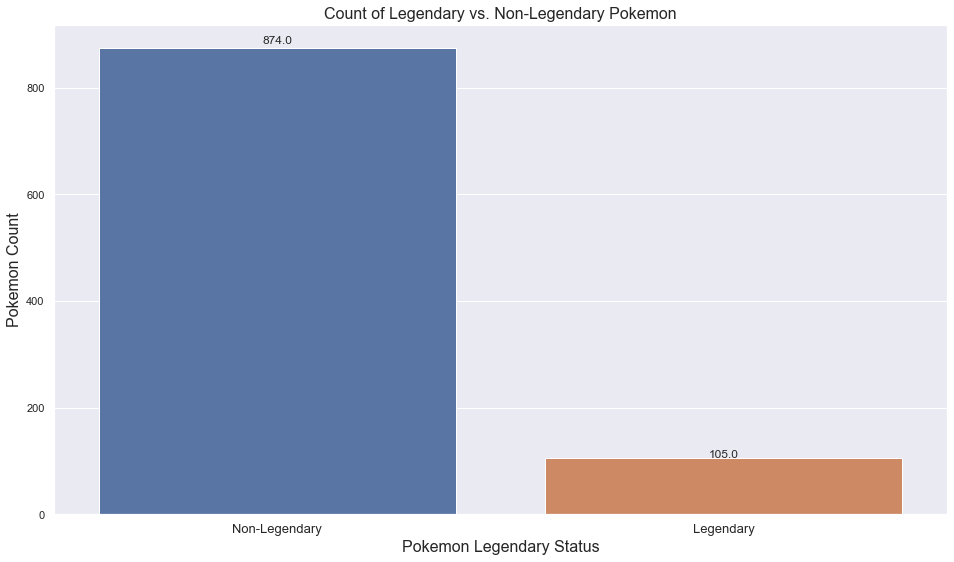

In [85]:
plt.figure(figsize=(16,9)) 
p = sns.countplot(x='legendary', 
                  data=pokedex, 
                  order=pokedex['legendary'].value_counts().index)
show_values(p)

fontsize = 16
plt.xlabel('Pokemon Legendary Status', fontsize=fontsize)
plt.ylabel('Pokemon Count', fontsize=fontsize)
plt.xticks(fontsize=fontsize-3, ticks=[0, 1], labels=['Non-Legendary', 'Legendary'])
plt.yticks(fontsize=fontsize-5)
plt.title('Count of Legendary vs. Non-Legendary Pokemon', fontsize=fontsize);

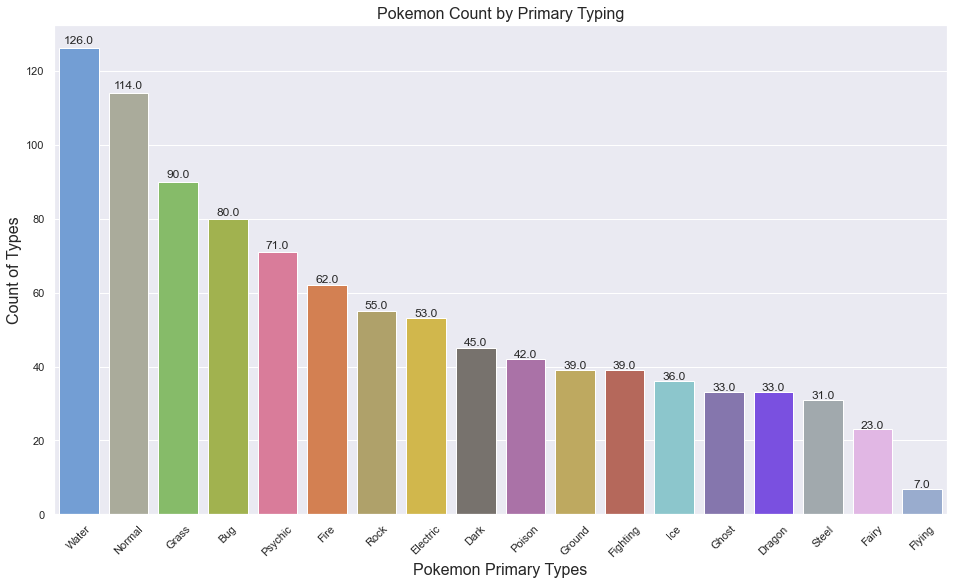

In [86]:
plt.figure(figsize=(16,9)) 
p = sns.countplot(x='primary_type', 
                  data=pokedex, 
                  palette=type_colors, 
                  order=pokedex['primary_type'].value_counts().index)
show_values(p)

fontsize = 16
plt.xlabel('Pokemon Primary Types', fontsize=fontsize)
plt.ylabel('Count of Types', fontsize=fontsize)
plt.xticks(fontsize=fontsize-5, rotation=45)
plt.yticks(fontsize=fontsize-5)
plt.title('Pokemon Count by Primary Typing', fontsize=fontsize);

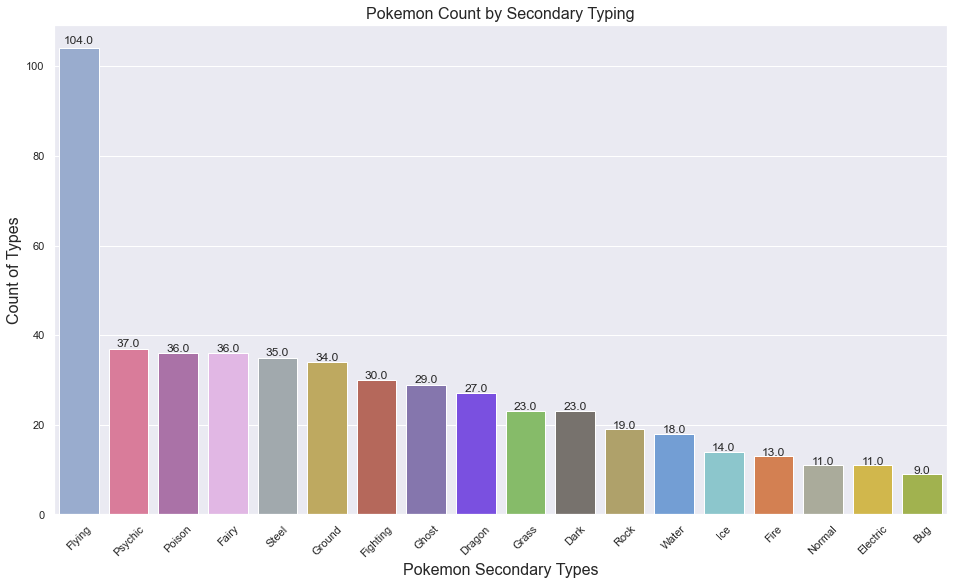

In [87]:
sns.set_theme()
plt.figure(figsize=(16,9)) 
p = sns.countplot(x='secondary_type', 
              data=pokedex, 
              palette=type_colors, 
              order=pokedex['secondary_type'].value_counts().index)
show_values(p)

fontsize = 16
plt.xlabel('Pokemon Secondary Types', fontsize=fontsize)
plt.ylabel('Count of Types', fontsize=fontsize)
plt.xticks(fontsize=fontsize-5, rotation=45)
plt.yticks(fontsize=fontsize-5)
plt.title('Pokemon Count by Secondary Typing', fontsize=fontsize);

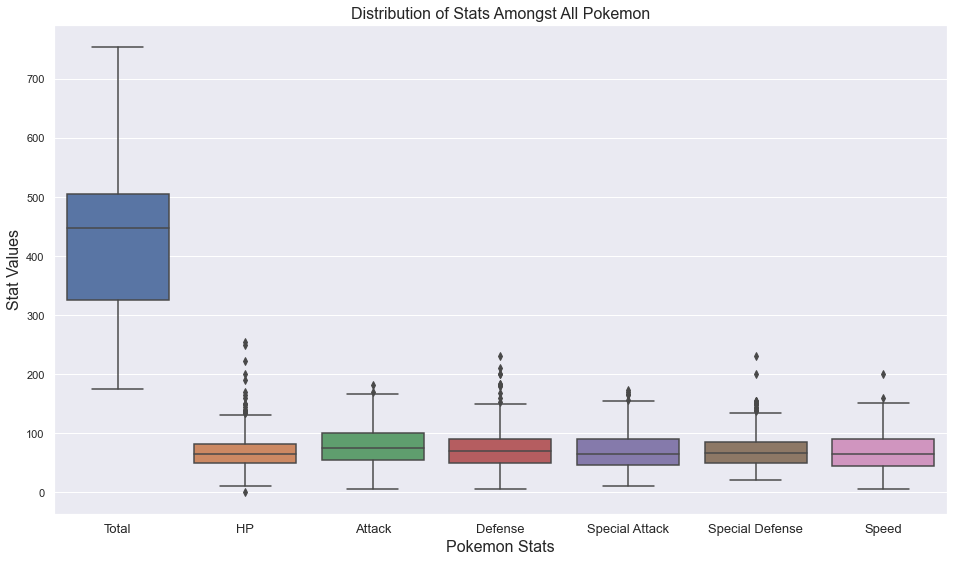

In [93]:
plt.figure(figsize=(16,9))
sns.boxplot(data=pokedex[['total', 'hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']]).set_xticklabels(['Total', 'HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed'])

fontsize = 16
plt.xlabel('Pokemon Stats', fontsize=fontsize)
plt.ylabel('Stat Values', fontsize=fontsize)
plt.xticks(fontsize=fontsize-3)
plt.yticks(fontsize=fontsize-5)
plt.title('Distribution of Stats Amongst All Pokemon', fontsize=fontsize);

## 1. Are there correlations between stats and lengendary vs. non-legendary Pokemon?

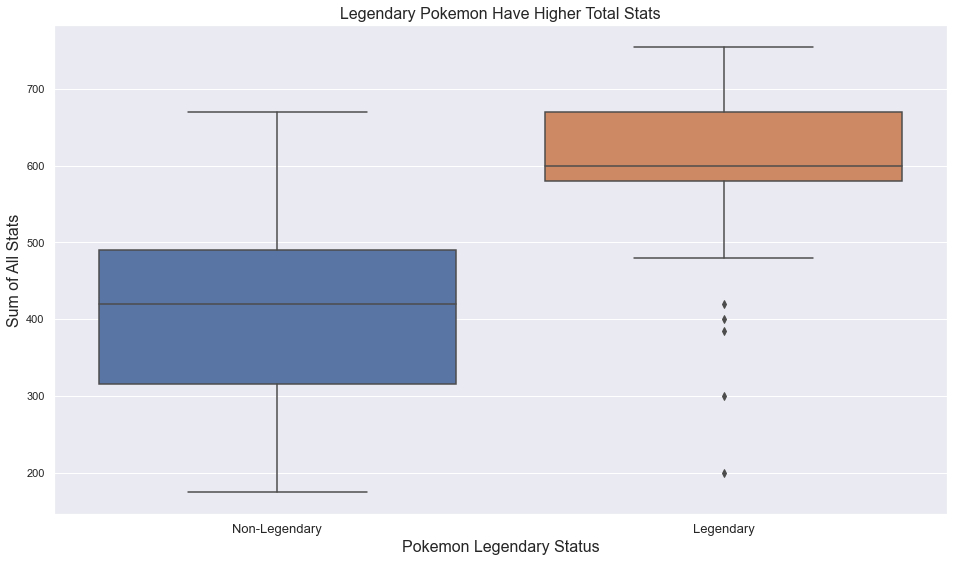

In [95]:
plt.figure(figsize=(16,9))
sns.boxplot(x='legendary', 
               y='total', 
               data=pokedex)

fontsize = 16
plt.xlabel('Pokemon Legendary Status', fontsize=fontsize)
plt.ylabel('Sum of All Stats', fontsize=fontsize)
plt.xticks(fontsize=fontsize-3, ticks=[0, 1], labels=['Non-Legendary', 'Legendary'])
plt.yticks(fontsize=fontsize-5)
plt.title('Legendary Pokemon Have Higher Total Stats', fontsize=fontsize);

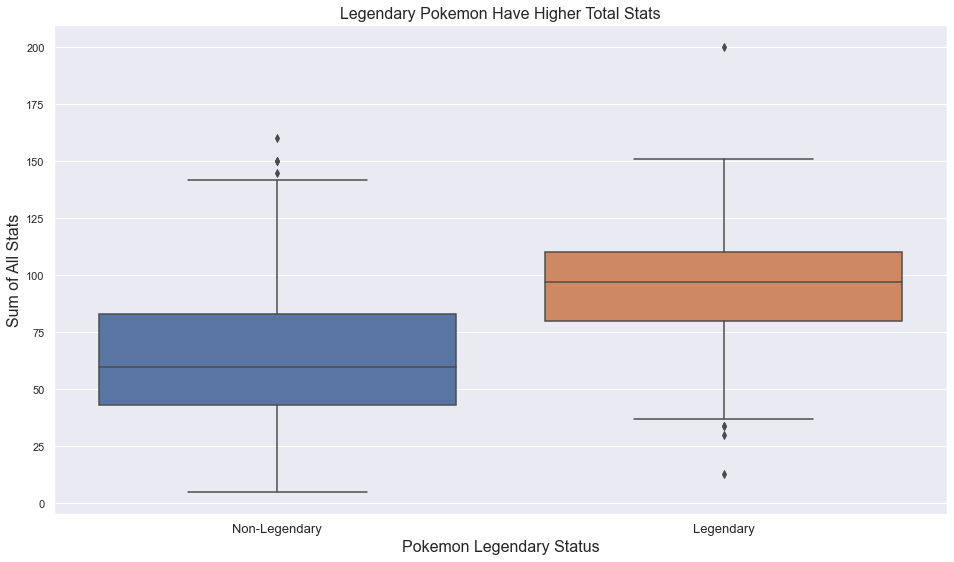

In [99]:
plt.figure(figsize=(16,9))
sns.boxplot(x='legendary', 
               y='speed', 
               data=pokedex)

fontsize = 16
plt.xlabel('Pokemon Legendary Status', fontsize=fontsize)
plt.ylabel('Sum of All Stats', fontsize=fontsize)
plt.xticks(fontsize=fontsize-3, ticks=[0, 1], labels=['Non-Legendary', 'Legendary'])
plt.yticks(fontsize=fontsize-5)
plt.title('Legendary Pokemon Have Higher Total Stats', fontsize=fontsize);

## 2. Are there correlations between stats and Pokemon's typing?

## 3. Is there a correlation between catch_rate and legendary status?

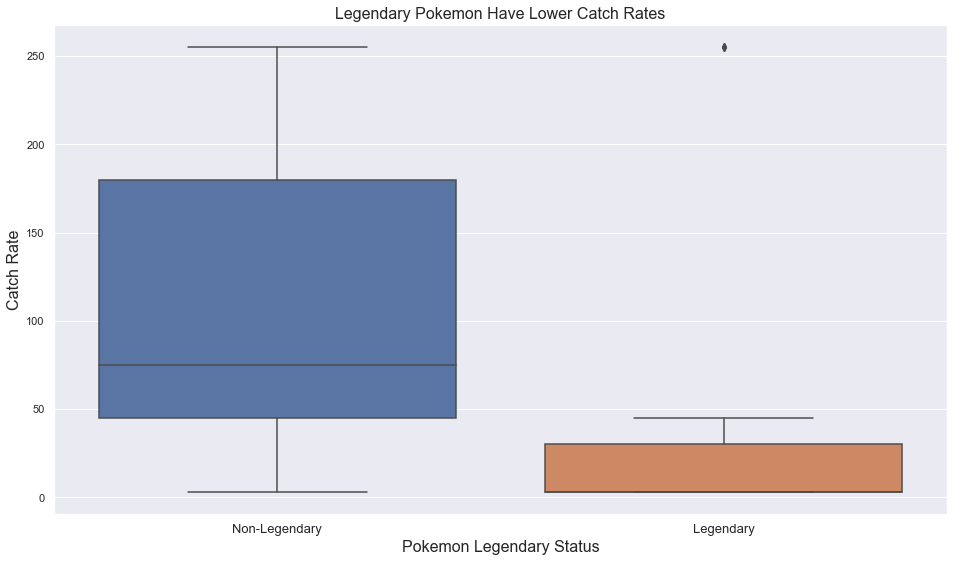

In [96]:
plt.figure(figsize=(16,9))
sns.boxplot(x='legendary', 
               y='catch_rate', 
               data=pokedex);

fontsize = 16
plt.xlabel('Pokemon Legendary Status', fontsize=fontsize)
plt.ylabel('Catch Rate', fontsize=fontsize)
plt.xticks(fontsize=fontsize-3, ticks=[0, 1], labels=['Non-Legendary', 'Legendary'])
plt.yticks(fontsize=fontsize-5)
plt.title('Legendary Pokemon Have Lower Catch Rates', fontsize=fontsize);